In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df = pd.read_csv("Student Engagement Level-Binary.csv")
df

,Student ID,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement Level
0,student000000,143,344,58,0,3,0,0,0,178.166667,92.716667,116.166667,129.016667,H
1,student000001,70,342,0,0,4,0,0,0,294.033333,196.083333,217.750000,235.955556,L
2,student000002,42,219,0,0,3,0,0,0,169.600000,235.733333,260.333333,221.888889,L
3,student000003,92,271,2,0,6,0,0,0,341.150000,245.900000,271.216667,286.088889,L
4,student000004,116,379,0,0,1,0,0,0,325.500000,236.283333,260.733333,274.172222,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,student000481,98,281,0,0,1,0,0,0,175.200000,89.966667,109.266667,124.811111,H
482,student000482,85,258,1,0,2,0,0,0,127.633333,58.783333,80.550000,88.988889,H
483,student000483,99,206,0,0,6,0,0,0,177.850000,185.400000,220.216667,194.488889,L
484,student000484,51,158,0,0,2,0,0,0,125.900000,32.450000,44.466667,67.605556,H


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Student ID                                    486 non-null    object 
 1   # Logins                                      486 non-null    int64  
 2   # Content Reads                               486 non-null    int64  
 3   # Forum Reads                                 486 non-null    int64  
 4   # Forum Posts                                 486 non-null    int64  
 5   # Quiz Reviews before submission              486 non-null    int64  
 6   Assignment 1 lateness indicator               486 non-null    int64  
 7   Assignment 2 lateness indicator               486 non-null    int64  
 8   Assignment 3 lateness indicator               486 non-null    int64  
 9   Assignment 1 duration to submit (in hours)    486 non-null    flo

In [5]:
df.isna().sum()

Student ID                                      0
# Logins                                        0
# Content Reads                                 0
# Forum Reads                                   0
# Forum Posts                                   0
# Quiz Reviews before submission                0
Assignment 1 lateness indicator                 0
Assignment 2 lateness indicator                 0
Assignment 3 lateness indicator                 0
Assignment 1 duration to submit (in hours)      0
Assignment 2 duration to submit (in hours)      0
Assignment 3 duration to submit (in hours)      0
Average time to submit assignment (in hours)    0
Engagement Level                                0
dtype: int64

# No Null values


In [9]:
#1 correlation between number of logins and engagement 


from scipy.stats import pointbiserialr


# Encode Engagement Level: H -> 1, L -> 0
df['Engagement Level Binary'] = df['Engagement Level'].apply(lambda x: 1 if x == 'H' else 0)

# Calculate Point Biserial Correlation
correlation, p_value = pointbiserialr(df['Average time to submit assignment (in hours)'], df['Engagement Level Binary'])

print(f'Point Biserial Correlation: {correlation}')
print(f'P-value: {p_value}')



Point Biserial Correlation: -0.9005400474215233
P-value: 3.3396279244193463e-177


## The results of the Point Biserial Correlation and p-value indicate the following:

1. Point Biserial Correlation: -0.9005
The correlation coefficient value is -0.9005, which is very close to -1.

This strong negative correlation suggests that as the average time to submit assignment increases, the likelihood of a high engagement level (H) decreases significantly. In other words, students who take longer to submit assignments tend to have a lower engagement level.

Range of correlation values:

+1: Perfect positive correlation (as one variable increases, the other increases).
0: No correlation.
-1: Perfect negative correlation (as one variable increases, the other decreases).
2. P-value: 3.34e-177 (approximately 0)
The p-value is extremely small, almost 0, which indicates that the result is statistically significant.
A low p-value (usually less than 0.05) means that there is a very low probability that this correlation occurred by chance.
In this case, the result is highly significant, suggesting that the relationship between average time to submit and engagement level is real and not due to random chance.
Summary:
There is a strong, statistically significant negative correlation between average time to submit assignments and engagement level.
As students take longer to submit their assignments, their engagement level tends to be lower. This could imply that quicker submissions are associated with higher engagement.

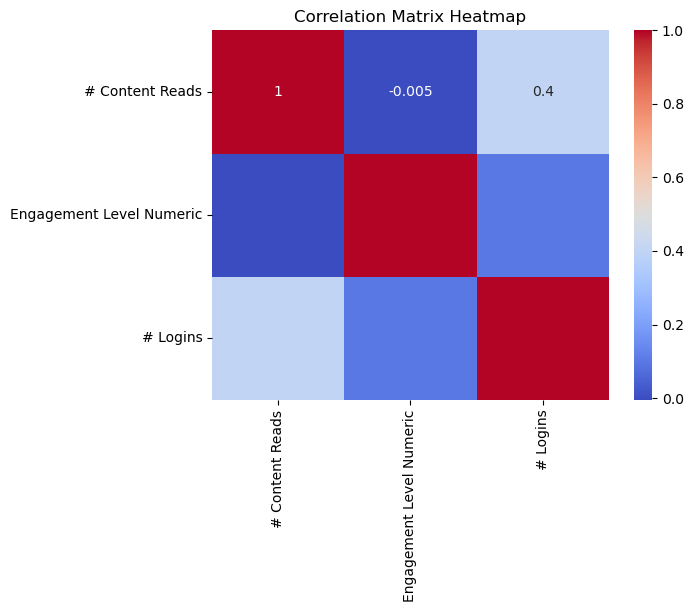

In [13]:
 df['Engagement Level Numeric'] = df['Engagement Level'].apply(lambda x: 1 if x == 'H' else 0)

# Calculate correlation matrix
corr = df[['# Content Reads', 'Engagement Level Numeric', '# Logins']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

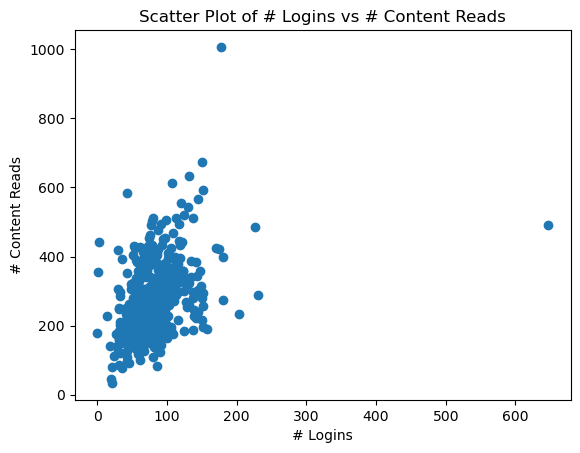

In [16]:
#are students logging in to read content ? This will answer if the content is useful
plt.scatter(df['# Logins'], df['# Content Reads'])
plt.title('Scatter Plot of # Logins vs # Content Reads')
plt.xlabel('# Logins')
plt.ylabel('# Content Reads')
plt.show()


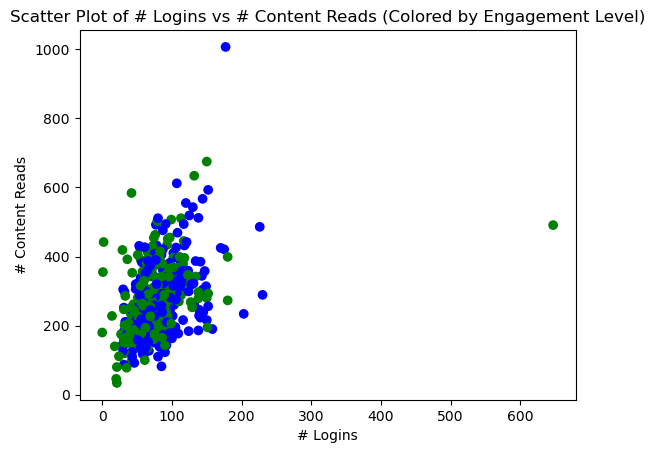

In [17]:
colors = {'H': 'blue', 'L': 'green'}  # Define colors for categories
plt.scatter(df['# Logins'], df['# Content Reads'], c=df['Engagement Level'].map(colors))
plt.title('Scatter Plot of # Logins vs # Content Reads (Colored by Engagement Level)')
plt.xlabel('# Logins')
plt.ylabel('# Content Reads')
plt.show()


# From the scatter plot of # Logins vs # Content Reads (colored by Engagement Level), a few observations can be made:

1. Clustering of Points at Lower Logins and Content Reads:
Most of the students are clustered in the lower range of # Logins (between 0 and 200) and # Content Reads (between 0 and 600). This suggests that the majority of students have relatively fewer logins and content reads.
2. Separation of Engagement Levels:
Blue points represent one engagement level (e.g., High) while green points represent the other (e.g., Low).
Both High and Low engagement students seem to be concentrated in the same region of the plot, especially in the low-to-medium range for both logins and content reads. This suggests that logins and content reads alone may not be sufficient to fully differentiate the engagement levels.
3. Outliers:
There are a few significant outliers in terms of # Logins and # Content Reads.
One student has over 600 logins but a moderate number of content reads (~400). This student may be logging in frequently but not engaging deeply with the content.
Another outlier has over 1000 content reads but relatively fewer logins (~100), indicating that this student may be reading a lot of content in fewer sessions.
4. General Relationship:
There seems to be a positive relationship between # Logins and # Content Reads (i.e., as the number of logins increases, the number of content reads also tends to increase). However, the relationship is not perfectly linear, as indicated by the scattered nature of the points.

The correlation coefficient between # Logins and # Content Reads is approximately 0.02. This indicates a very weak positive relationship, meaning that there is almost no linear correlation between the number of logins and the number of content reads in this dataset.

This suggests that increasing logins is not strongly associated with an increase in content reads, at least for the data you have. The relationship between these two variables might be influenced by other factors, or it may be nonlinear.

In [18]:
df['Engagement Level Numeric'] = df['Engagement Level'].map({'H': 1, 'L': 0})

# Calculate the correlation
correlation = df['# Content Reads'].corr(df['Engagement Level Numeric'])

print("Correlation between # Content Reads and Engagement Level:", correlation)

Correlation between # Content Reads and Engagement Level: -0.0050350249977007


Interpretation:
Weak Correlation: The value is very close to zero, indicating that there is essentially no linear relationship between the number of content reads and the engagement level. This means that changes in the number of content reads do not correspond to significant changes in the engagement levels of students.

Negative Correlation: While it's weak, the negative value suggests that, if there were any relationship, it would imply that as the number of content reads increases, the engagement level might slightly decrease. However, given that the correlation is so close to zero, this inference is not meaningful in practice.

Inference:
Independence of Variables: The weak correlation implies that other factors might be influencing engagement levels more significantly than the number of content reads. This could suggest that simply reading content is not a strong predictor of engagement.

Need for Further Analysis: To better understand student engagement, you might want to consider looking at other variables, such as:

The quality of the content
Interaction in forums (like posts and reads)
The completion rate of assignments
The overall time spent on the platform
Potential Multicollinearity: It might also be worthwhile to explore if there are other variables that, when combined, provide more insights into engagement levels.

In [19]:
df['Engagement Level Numeric'] = df['Engagement Level'].map({'H': 1, 'L': 0})

# Calculate the correlation
correlation = df['# Forum Reads'].corr(df['Engagement Level Numeric'])

print("Correlation between # Forum Reads and Engagement Level:", correlation)

Correlation between # Forum Reads and Engagement Level: 0.11390049389799618


Interpretation:
Weak Positive Correlation: The positive value suggests that there is a slight tendency for higher forum reads to be associated with higher engagement levels. However, since the correlation is weak, this relationship is not strong enough to make definitive conclusions.

Strength of the Correlation:

Values close to 0 indicate a weak relationship, while values closer to 1 would suggest a stronger positive relationship.
In this case, a value of 0.114 suggests that while there is a small positive trend, it is not substantial.
Inference:
Potential Influence on Engagement: The positive correlation implies that students who read more forum posts may have slightly higher engagement levels. However, the strength of this correlation suggests that forum reads alone are not a strong predictor of engagement. Other factors are likely contributing to engagement levels more significantly.

Interaction in Forums: Engaging with forums might be an indicator of overall engagement with the learning platform, but it’s just one piece of the puzzle. It could suggest that students who are more involved in discussions or content related to forums may be more engaged overall.

In [20]:
#More engagement comes from forum reads as compared to content reads however the overall engaagement is still lower 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
df['Engagement Level Numeric'] = df['Engagement Level'].map({'H': 1, 'L': 0})

In [24]:
X = df[['# Logins', '# Content Reads', '# Forum Reads', '# Forum Posts', 
         '# Quiz Reviews before submission', 
         'Assignment 1 duration to submit (in hours)', 
         'Assignment 2 duration to submit (in hours)', 
         'Assignment 3 duration to submit (in hours)', 
         'Average time to submit assignment (in hours)']]
y = df['Engagement Level Numeric']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[37  0]
 [ 0 61]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        61

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



In [28]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Make predictions
y_log_pred = log_model.predict(X_test_scaled)

# Evaluate the Logistic Regression model
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_log_pred))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_log_pred))


Logistic Regression Confusion Matrix:
[[37  0]
 [ 0 61]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        61

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
df['Engagement Level Numeric'] = df['Engagement Level'].map({'H': 1, 'L': 0})

# Select features and target variable
X = df[['# Logins', '# Content Reads', '# Forum Reads', '# Forum Posts', 
         '# Quiz Reviews before submission', 
         'Assignment 1 duration to submit (in hours)', 
         'Assignment 2 duration to submit (in hours)', 
         'Assignment 3 duration to submit (in hours)', 
         'Average time to submit assignment (in hours)']]
y = df['Engagement Level Numeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# 2. Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_log_pred = log_model.predict(X_test_scaled)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_log_pred))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_log_pred))

# 3. Support Vector Classifier (SVC)
svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)
y_svc_pred = svc_model.predict(X_test_scaled)
print("SVC Confusion Matrix:")
print(confusion_matrix(y_test, y_svc_pred))
print("\nSVC Classification Report:")
print(classification_report(y_test, y_svc_pred))

# 4. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_gb_pred = gb_model.predict(X_test_scaled)
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_gb_pred))
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_gb_pred))

# 5. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_knn_pred = knn_model.predict(X_test_scaled)
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_knn_pred))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_knn_pred))

Random Forest Confusion Matrix:
[[37  0]
 [ 0 61]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        61

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

Logistic Regression Confusion Matrix:
[[37  0]
 [ 0 61]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        61

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

SVC Confusion Matrix:
[[37  0]
 [ 0 61]]

SVC Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.0

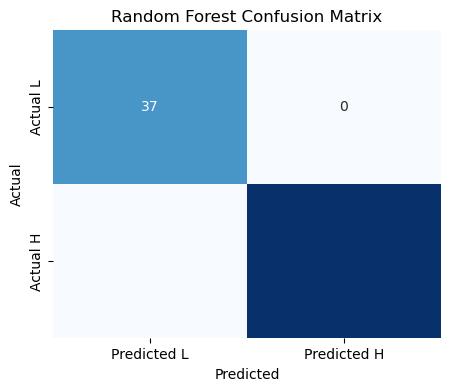

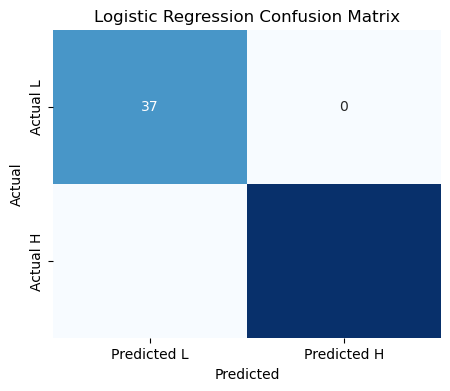

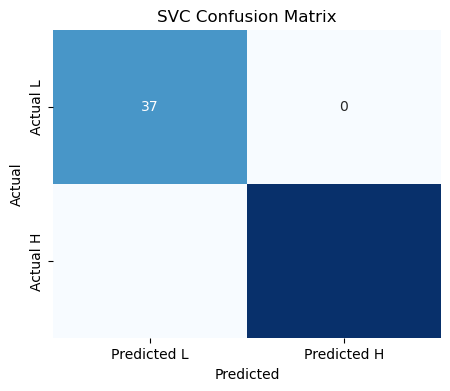

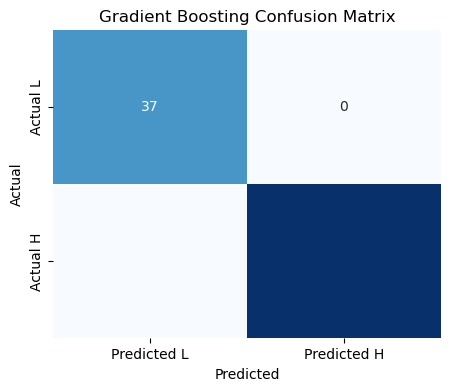

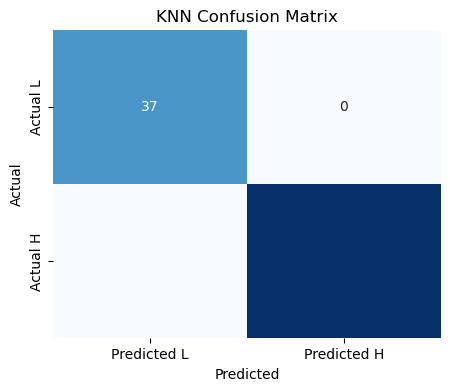

In [31]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted L', 'Predicted H'],
                yticklabels=['Actual L', 'Actual H'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, y_log_pred, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_svc_pred, "SVC Confusion Matrix")
plot_confusion_matrix(y_test, y_gb_pred, "Gradient Boosting Confusion Matrix")
plot_confusion_matrix(y_test, y_knn_pred, "KNN Confusion Matrix")

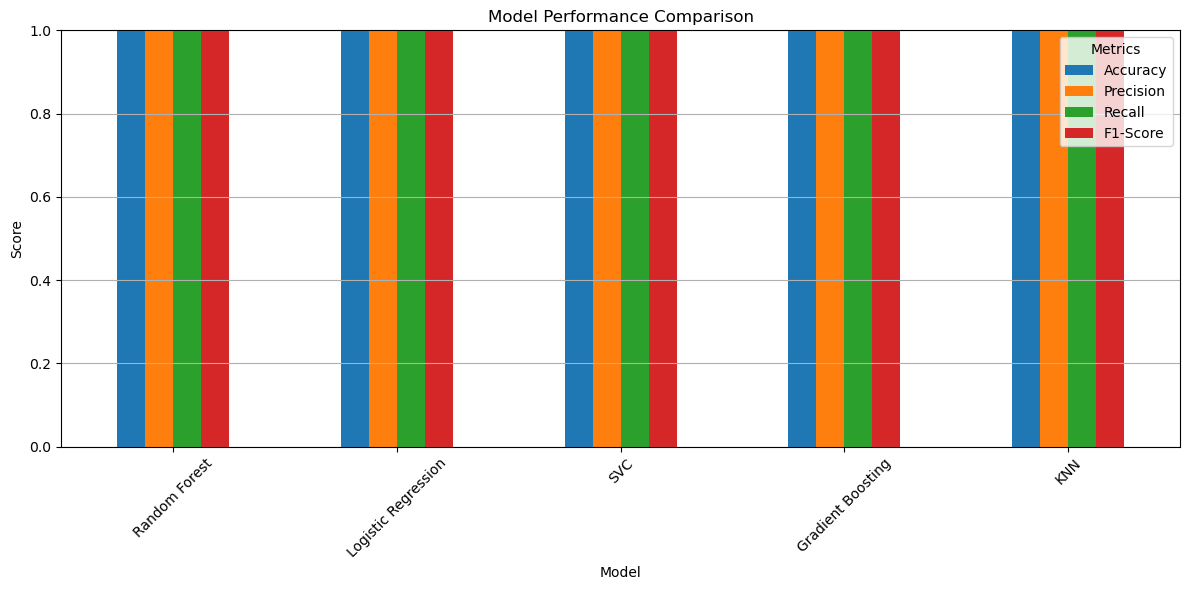

In [33]:
from sklearn.metrics import accuracy_score

# Collect performance metrics
metrics = {
    'Model': ['Random Forest', 'Logistic Regression', 'SVC', 'Gradient Boosting', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, y_log_pred),
        accuracy_score(y_test, y_svc_pred),
        accuracy_score(y_test, y_gb_pred),
        accuracy_score(y_test, y_knn_pred)
    ],
    'Precision': [
        classification_report(y_test, rf_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_log_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_svc_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_gb_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_knn_pred, output_dict=True)['1']['precision']
    ],
    'Recall': [
        classification_report(y_test, rf_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_log_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_svc_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_gb_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_knn_pred, output_dict=True)['1']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, rf_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_log_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_svc_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_gb_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_knn_pred, output_dict=True)['1']['f1-score']
    ]
}

# Convert to DataFrame for plotting
metrics_df = pd.DataFrame(metrics)

# Set the index for easy plotting
metrics_df.set_index('Model', inplace=True)

# Plotting the metrics
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better comparison
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()
